In [ ]:
import pandas as pd

# Load the dataset from the uploaded file
df = pd.read_excel('/content/Online Retail.xlsx')

# Display the first few rows of the DataFrame
display(df.head(10))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:

# Display the summary of the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Optional: make CustomerID integer
df['CustomerID'] = df['CustomerID'].astype(int)

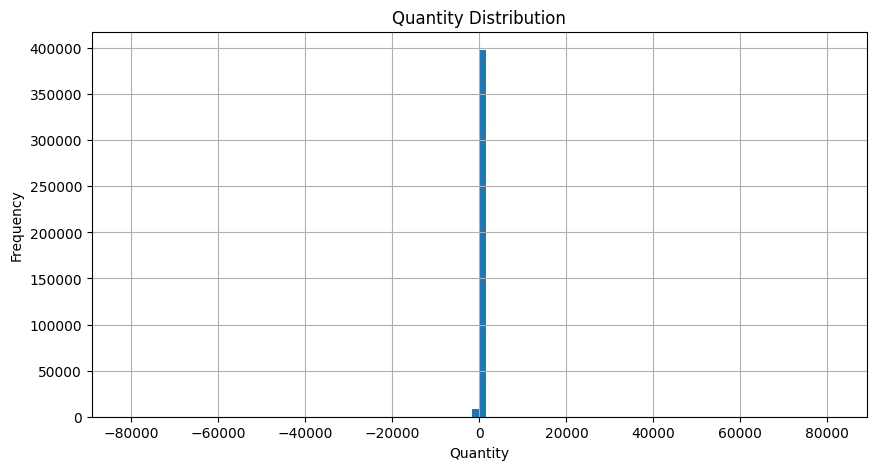

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Quantity'].hist(bins=100)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

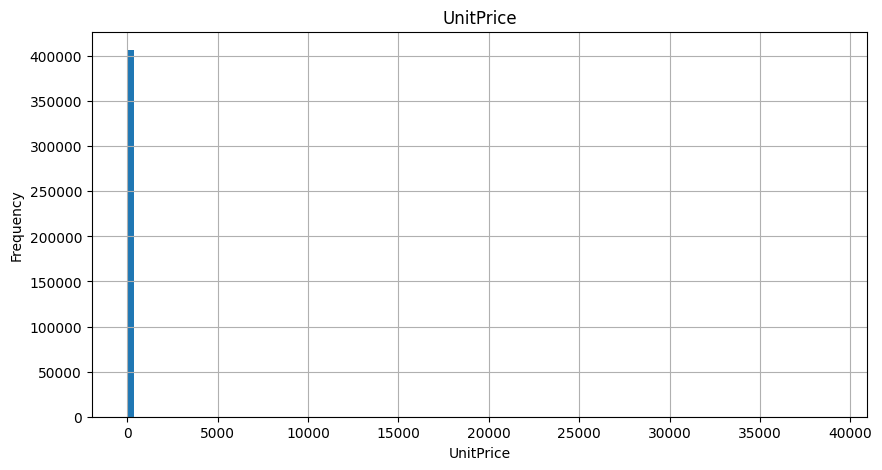

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['UnitPrice'].hist(bins=100)
plt.title('UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print((df['Quantity'] <= 0).sum(), "negative quantities left")
print((df['UnitPrice'] <= 0).sum(), "non-positive prices left")


0 negative quantities left
0 non-positive prices left


In [ ]:
df.duplicated().sum()


np.int64(5192)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

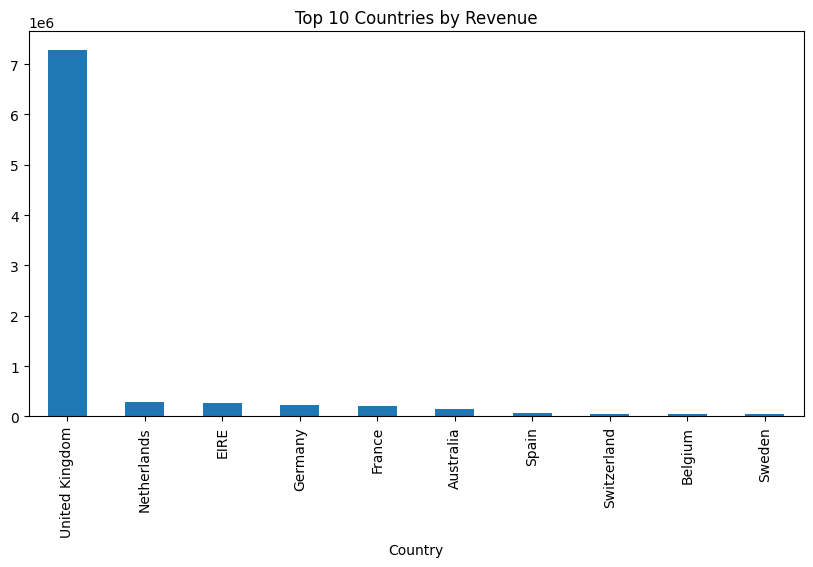

In [ ]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Revenue')

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceMonth'>

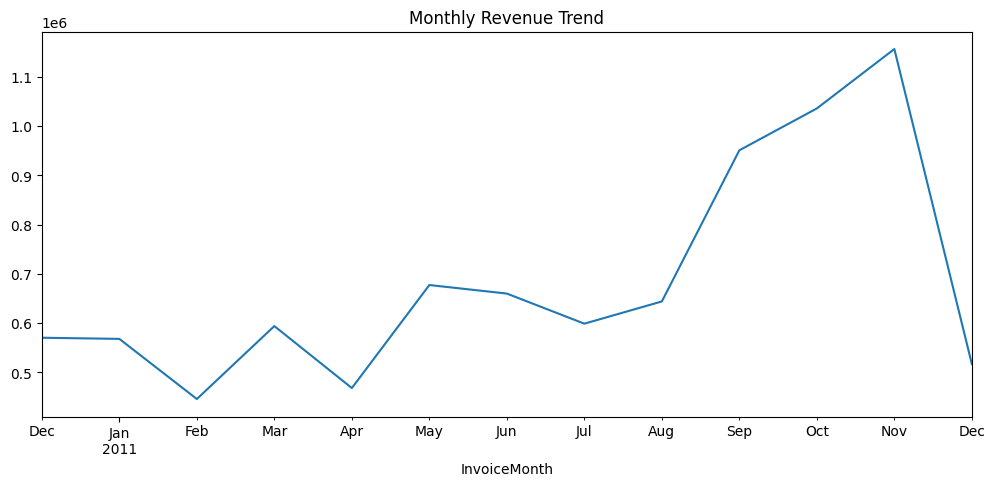

In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()
monthly_revenue.plot(kind='line', figsize=(12,5), title='Monthly Revenue Trend')


<Axes: title={'center': 'Top 10 Customers by Revenue'}, xlabel='CustomerID'>

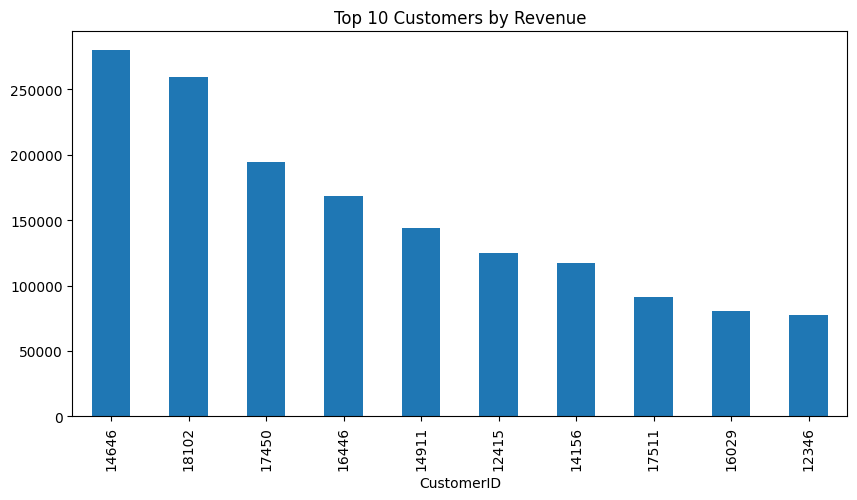

In [ ]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), title='Top 10 Customers by Revenue')


In [ ]:
import datetime as dt
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(snapshot_date)


2011-12-10 12:50:00


In [ ]:
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (snapshot_date - last_purchase).dt.days
recency_df = recency.to_frame().reset_index()
recency_df.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)
display(recency_df.head())

,CustomerID,Recency
0,12346,326
1,12347,2
2,12348,75
3,12349,19
4,12350,310


In [ ]:
rfm.shape

NameError: name 'rfm' is not defined

In [ ]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency_df = frequency.to_frame().reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
display(frequency_df.head())

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [ ]:
monetary = df.groupby('CustomerID')['Revenue'].sum()
monetary_df = monetary.to_frame().reset_index()
monetary_df.rename(columns={'Revenue': 'Monetary'}, inplace=True)
display(monetary_df.head())

rfm = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


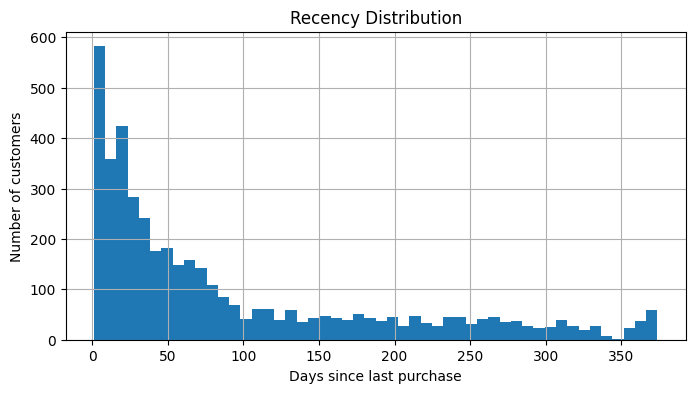

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
rfm['Recency'].hist(bins=50)
plt.title('Recency Distribution')
plt.xlabel('Days since last purchase')
plt.ylabel('Number of customers')
plt.show()

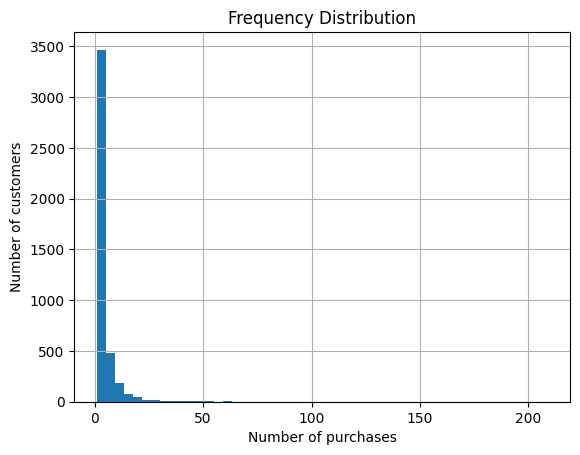

In [ ]:
rfm['Frequency'].hist(bins=50)
plt.title('Frequency Distribution')
plt.xlabel('Number of purchases')
plt.ylabel('Number of customers')
plt.show()

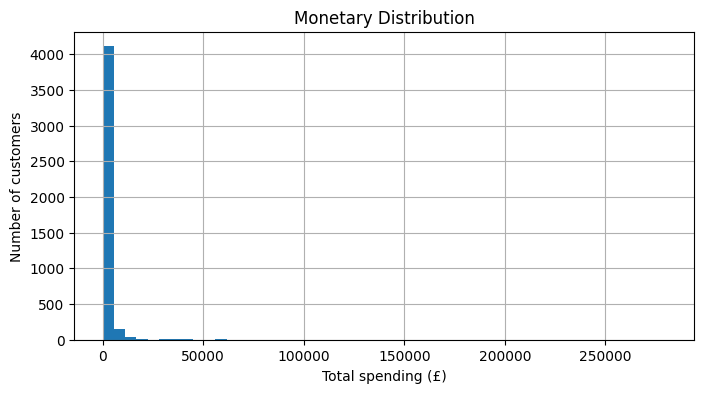

In [ ]:
plt.figure(figsize=(8,4))
rfm['Monetary'].hist(bins=50)
plt.title('Monetary Distribution')
plt.xlabel('Total spending (£)')
plt.ylabel('Number of customers')
plt.show()


In [ ]:
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [ ]:
# Recency: smaller is better → highest score for most recent
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency: larger is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary: larger is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)
# Concatenate as string (e.g., '555', '342')
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

# Add numeric total (3–15 range)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)


In [ ]:
rfm[['CustomerID','Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Segment','RFM_Score']].head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346,326,1,77183.60,1,1,5,115,7
1,12347,2,7,4310.00,5,5,5,555,15
2,12348,75,4,1797.24,2,4,4,244,10
3,12349,19,1,1757.55,4,1,4,414,9
4,12350,310,1,334.40,1,1,2,112,4


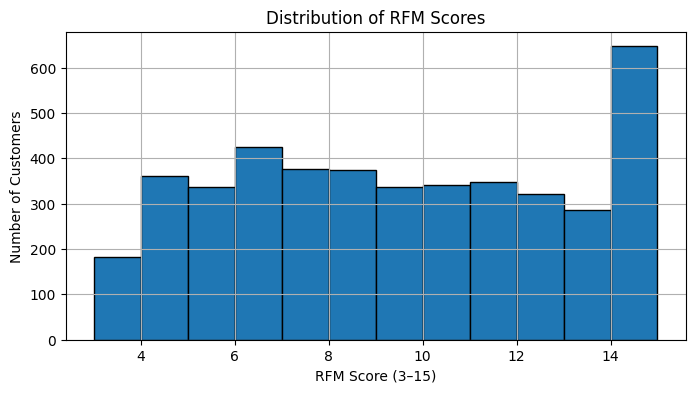

In [ ]:
plt.figure(figsize=(8,4))
rfm['RFM_Score'].hist(bins=12, edgecolor='black')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score (3–15)')
plt.ylabel('Number of Customers')
plt.show()


/tmp/ipython-input-3019865450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_segments.index, y=top_segments.values, palette="viridis")


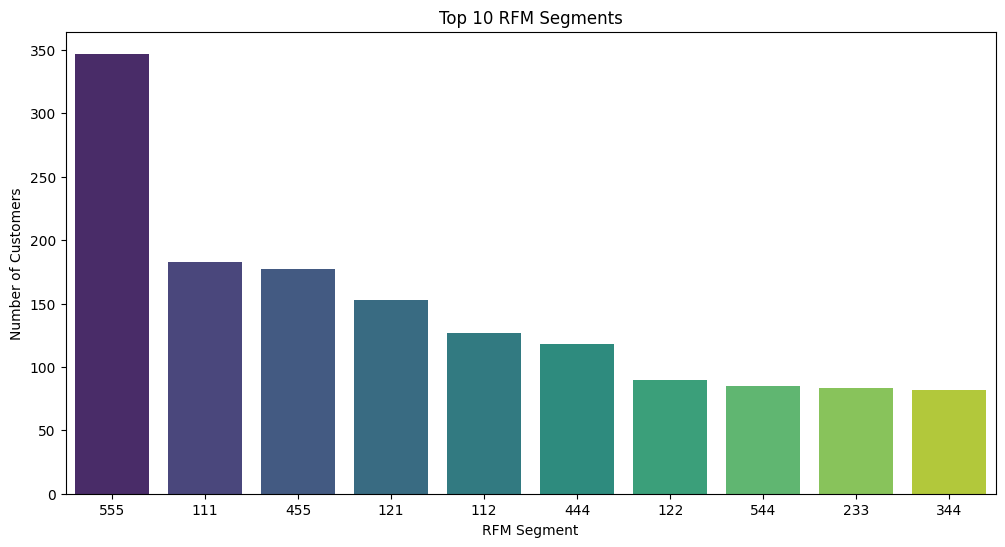

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
top_segments = rfm['RFM_Segment'].value_counts().head(10)
sns.barplot(x=top_segments.index, y=top_segments.values, palette="viridis")
plt.title('Top 10 RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()


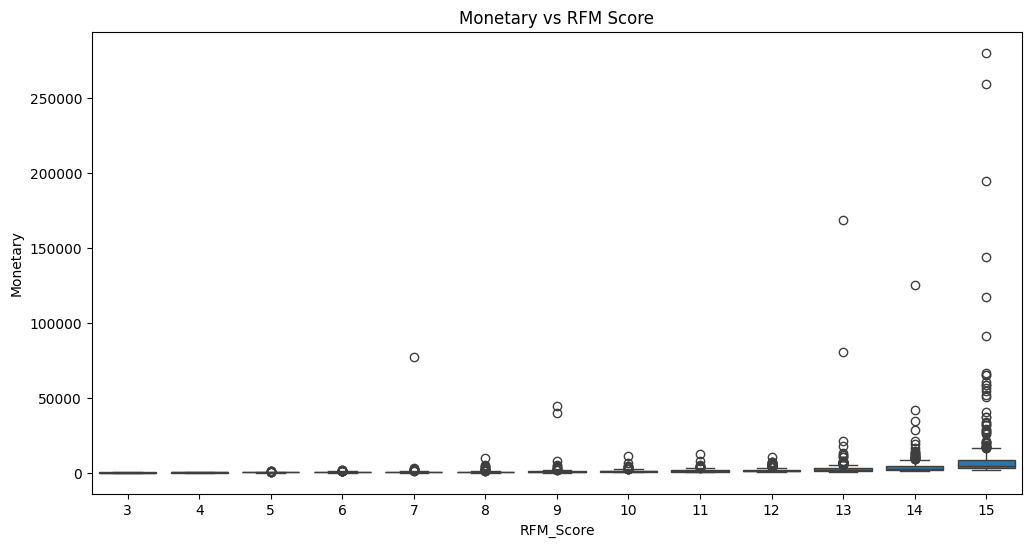

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='RFM_Score', y='Monetary', data=rfm)
plt.title('Monetary vs RFM Score')
plt.show()


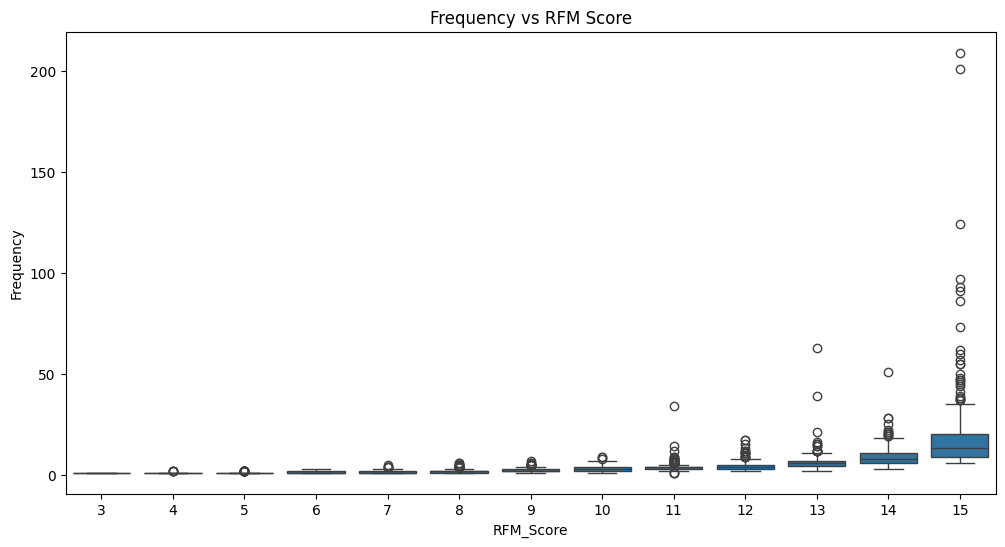

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='RFM_Score', y='Frequency', data=rfm)
plt.title('Frequency vs RFM Score')
plt.show()


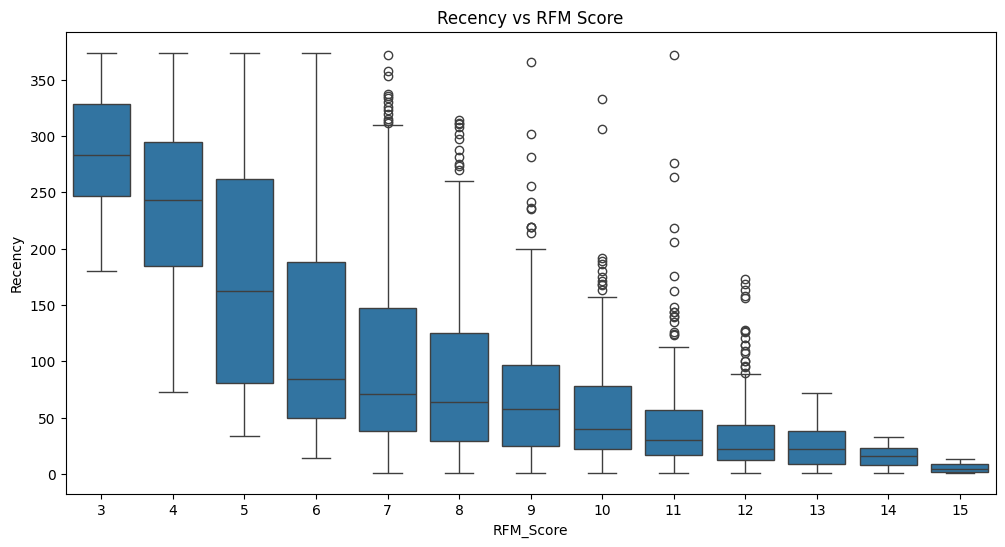

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='RFM_Score', y='Recency', data=rfm)
plt.title('Recency vs RFM Score')
plt.show()


/tmp/ipython-input-3855300768.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=['Champions','Loyal','At Risk','Lost'], palette="viridis")


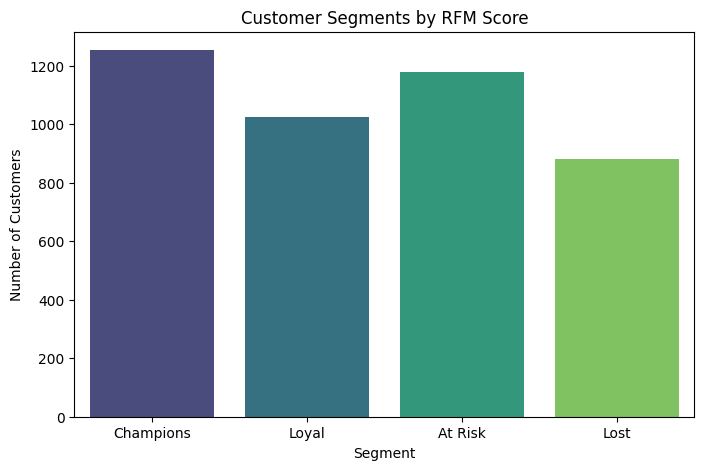

In [ ]:
def segment_customer(score):
    if score >= 12:
        return "Champions"
    elif score >= 9:
        return "Loyal"
    elif score >= 6:
        return "At Risk"
    else:
        return "Lost"

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm['Segment'].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=['Champions','Loyal','At Risk','Lost'], palette="viridis")
plt.title('Customer Segments by RFM Score')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()



Segment
Champions    6815805.220
Loyal        1188027.551
At Risk       681751.663
Lost          201624.460
Name: Monetary, dtype: float64


/tmp/ipython-input-2454660414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette="viridis")


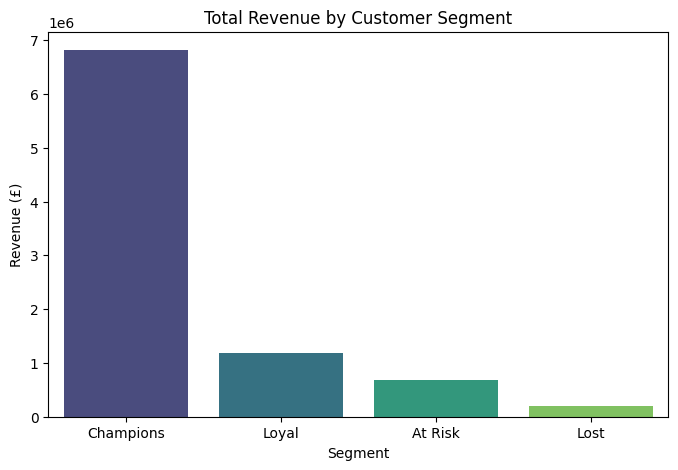

In [ ]:
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
print(segment_revenue)
plt.figure(figsize=(8,5))
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, palette="viridis")
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue (£)')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the RFM values
X = rfm[['Recency','Frequency','Monetary']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Turn back into DataFrame for easier viewing
X_scaled = pd.DataFrame(X_scaled, columns=['Recency','Frequency','Monetary'])
X_scaled.head()


,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the RFM values
X = rfm[['Recency','Frequency','Monetary']]

# Scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Turn back into DataFrame for easier viewing
X_scaled = pd.DataFrame(X_scaled, columns=['Recency','Frequency','Monetary'])
X_scaled.head()
from sklearn.cluster import KMeans

# Set k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

rfm.head()
# Get cluster centers in scaled values
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency','Frequency','Monetary'])
centers


,Recency,Frequency,Monetary
0,-0.488324,-0.076562,-0.077365
1,1.555354,-0.353379,-0.174733
2,-0.851496,10.168289,13.928825
3,-0.770344,2.346506,1.184504


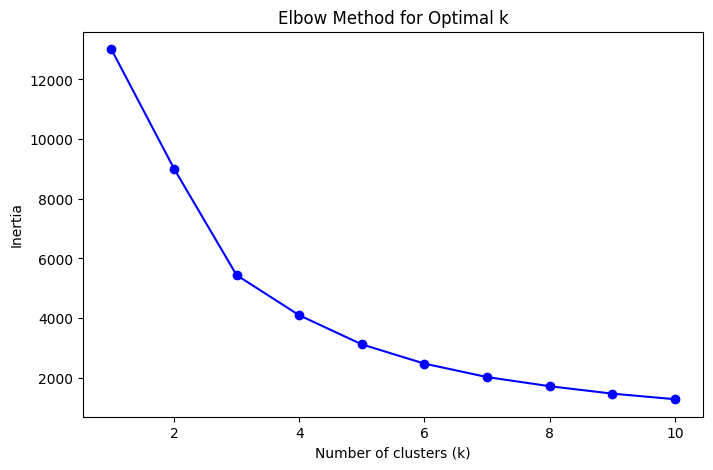

In [ ]:
inertia = []
K = range(1, 11)  # test 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster_3'] = kmeans3.fit_predict(X_scaled)

# Check the cluster centers
centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=['Recency','Frequency','Monetary'])
centers3


,Recency,Frequency,Monetary
0,1.545658,-0.349451,-0.157947
1,-0.510809,0.052064,-0.022152
2,-0.864957,8.074597,9.324975


In [ ]:
cluster_profile = rfm.groupby('Cluster_3').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'
}).rename(columns={'CustomerID':'NumCustomers'})

cluster_profile


,Recency,Frequency,Monetary,NumCustomers
Cluster_3,,,,
0,247.106285,1.582255,629.663689,1082
1,41.454180,4.672755,1849.670202,3230
2,6.038462,66.423077,85826.078077,26


In [ ]:
revenue_by_cluster = rfm.groupby('Cluster_3')['Monetary'].sum().sort_values(ascending=False)
revenue_by_cluster


,Monetary
Cluster_3,
1,5974434.753
2,2231478.030
0,681296.111


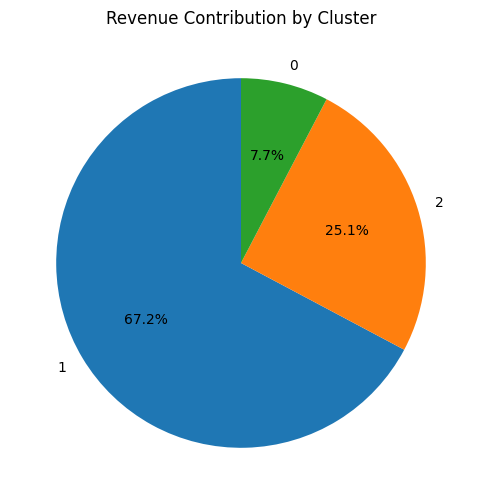

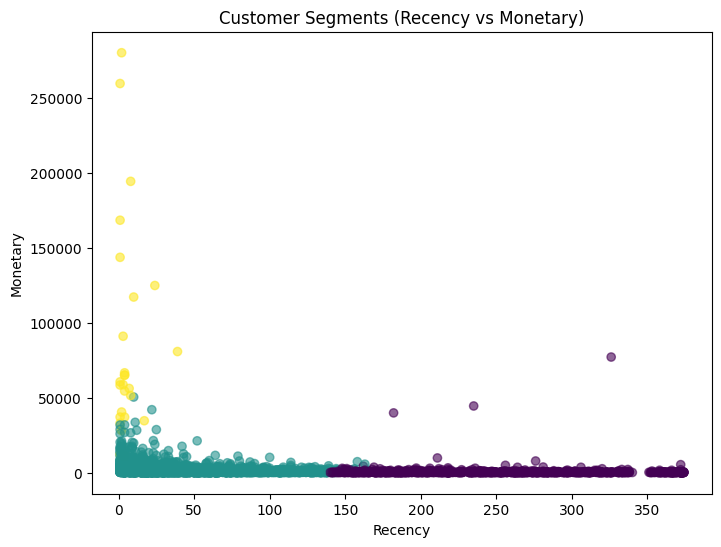

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for revenue contribution
revenue_by_cluster.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Revenue Contribution by Cluster")
plt.ylabel("")
plt.show()

# Scatter plot for 2D view
plt.figure(figsize=(8,6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster_3'], cmap='viridis', alpha=0.6)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()


In [ ]:
cluster_names = {
    0: 'Lost/At Risk',
    1: 'Loyal Customers',
    2: 'Champions'
}

rfm['Segment'] = rfm['Cluster_3'].map(cluster_names)


/tmp/ipython-input-3226057500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kmeans_revenue.index, y=kmeans_revenue.values, palette="viridis")


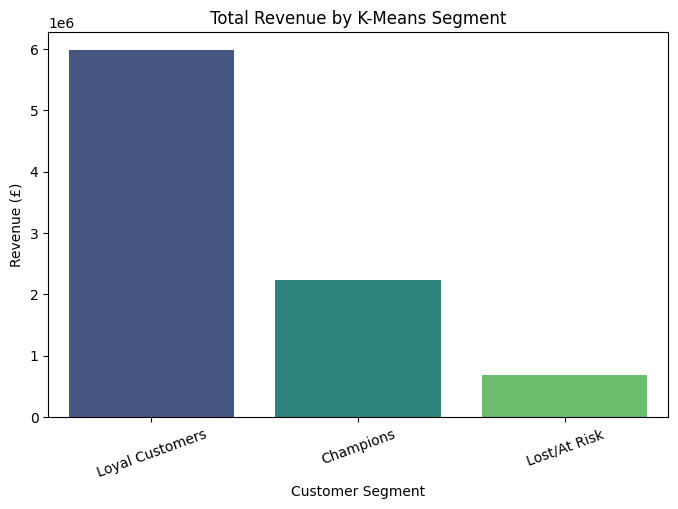

In [ ]:
# Aggregate revenue per segment
kmeans_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=kmeans_revenue.index, y=kmeans_revenue.values, palette="viridis")
plt.title('Total Revenue by K-Means Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=20)
plt.show()


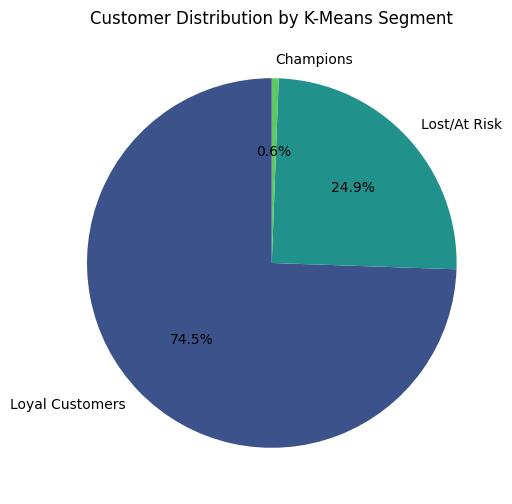

In [ ]:
kmeans_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(kmeans_counts)))
plt.title("Customer Distribution by K-Means Segment")
plt.show()


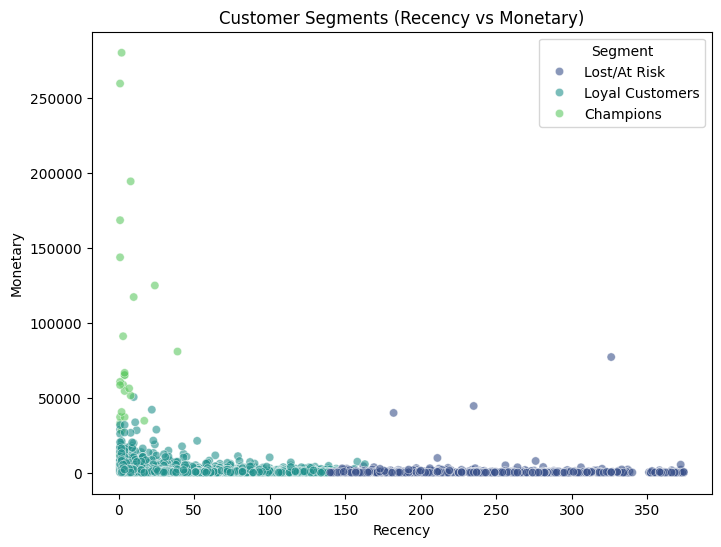

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=rfm, palette="viridis", alpha=0.6)
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()
